# Session 2: Training a network w/ Tensorflow
<p class='lead'>
Creative Applications of Deep Learning with Google's Tensorflow<br />
Parag K. Mital<br />
Kadenze, Inc.<br />
</p>

<a name="learning-goals"></a>
# Learning Goals

* The basic components of a neural network
* How to use gradient descent to optimize parameters of a neural network
* How to create a neural network for performing regression

<!-- MarkdownTOC autolink=true autoanchor=true bracket=round -->

- [Introduction](#introduction)
- [Gradient Descent](#gradient-descent)
    - [Defining Cost](#defining-cost)
    - [Minimizing Error](#minimizing-error)
    - [Backpropagation](#backpropagation)
    - [Extra details for notebook only](#extra-details-for-notebook-only)
    - [Local Minima/Optima](#local-minimaoptima)
    - [Learning Rate](#learning-rate)
- [Creating a Neural Network](#creating-a-neural-network)
    - [Defining Cost](#defining-cost-1)
    - [Training Parameters](#training-parameters)
    - [Training vs. Testing](#training-vs-testing)
    - [Stochastic and Mini Batch Gradient Descent](#stochastic-and-mini-batch-gradient-descent)
    - [Input's Representation](#inputs-representation)
    - [Over vs. Underfitting](#over-vs-underfitting)
    - [Introducing Nonlinearities / Activation Function](#introducing-nonlinearities--activation-function)
    - [Going Deeper](#going-deeper)
- [Image Inpainting](#image-inpainting)
    - [Description](#description)
    - [Building the Network](#building-the-network)
    - [Training](#training)
- [Homework:](#homework)
- [Reading:](#reading)

<!-- /MarkdownTOC -->

<a name="introduction"></a>
# Introduction

In this session we're going to take everything we've learned about Graphs, Sessions, Operations, and Tensors and use them all to form a neural network.  We're going to learn how we can use data and something called gradient descent to teach the network what the values of the parameters of this network should be.

In the last session, we saw how to normalize a dataset, using the dataset's mean and standard deviation.  While this seemed to reveal some interesting representations of our dataset, it left us with a lot more to explain.  In the case of faces, it really seemed to explain more about the background than the actual faces.  For instance, it wasn't able to describe the differences between different races, gender, expressions, hair style, hair color, or the other many various differences that one might be interested in.

What we're really interested in is letting the computer figure out what representations it needs in order to better describe the data and some objective that we've defined.  That is the fundamental idea behind machine learning: letting the machine learn from the data.  In this session, we're going to start to see how to do that.

Before we get into the details, I'm going to go over some background on gradient descent and the different components of a neural network.  If you're comfortable with all of this, please feel free to skip ahead.

<a name="gradient-descent"></a>
# Gradient Descent

Whenever we create a neural network, we have to define a set of operations.  These operations try to take us from some input to some output.  For instance, the input might be an image, or frame of a video, or text file, or sound file.  The operations of the network are meant to transform this input data into something meaningful that we want the network to learn about.

Initially, all of the parameters of the network are random.  So whatever is being output will also be random.  But let's say we need it to output something specific about the image.  To teach it to do that, we're going to use something called "Gradient Descent".  Simply, Gradient descent is a way of optimizing a set of parameters.

Let's say we have a few images, and know that given a certain image, when I feed it through a network, its parameters should help the final output of the network be able to spit out the word "orange", or "apple", or some appropriate *label* given the image of that object.  The parameters should somehow accentuate the "orangeness" of my image.  It probably will be able to transform an image in away that it ends up having high intensities for images that have the color orange in them, and probably prefer images that have that color in a fairly round arrangement.

Rather than hand crafting all of the possible ways an orange might be manifested, we're going to learn the best way to optimize its objective: separating oranges and apples.  How can we teach a network to learn something like this?

<a name="defining-cost"></a>
## Defining Cost

Well we need to define what "best" means.  In order to do so, we need a measure of the "error".  Let's continue with the two options we've been using: orange, or apple.  I can represent these as 0 and 1 instead.

I'm going to get a few images of oranges, and apples, and one by one, feed them into a network that I've randomly initialized.  I'll then filter the image, by just multiplying every value by some random set of values.  And then I'll just add up all the numbers, and then squash the result in a way that means I'll only ever get 0 or 1.  So I put in an image, and I get out a 0 or 1.  Except, the parameters of my network are totally random, and so my network will only ever spit out random 0s or 1s.  How can I get this random network to know when to spit out a 0 for images of oranges, and a 1 for images of apples?

We do that by saying, if the network predicts a 0 for an orange, then the error is 0.  If the network predicts a 1 for an orange, then the error is 1.  And vice-versa for apples.  If it spits out a 1 for an apple, then the error is 0.  If it spits out a 0 for an apple, then the error is 1.  What we've just done is create a function which describes error in terms of our parameters:

Let's write this another way:

\begin{align}
\text{error} = \text{network}(\text{image}) - \text{true_label}
\end{align}

where

\begin{align}
\text{network}(\text{image}) = \text{predicted_label}
\end{align}

More commonly, we'll see these components represented by the following letters:

\begin{align}
E = f(X) - y
\end{align}

Don't worry about trying to remember this equation.  Just see how it is similar to what we've done with the oranges and apples.  `X` is generally the input to the network, which is fed to some network, or a function $f$, which we know should output some label `y`.  Whatever difference there is between what it should output, y, and what it actually outputs, $f(x)$ is what is different, or error, $E$.


<a name="minimizing-error"></a>
## Minimizing Error

Instead of feeding one image at a time, we're going to feed in many.  Let's say 100.  This way, we can see what our network is doing on average.  If our error at the current network parameters is e.g. 50/100, we're correctly guessing about 50 of the 100 images.

Now for the crucial part.  If we move our network's parameters a tiny bit and see what happens to our error, we can actually use that knowledge to find smaller errors.  Let's say the error went up after we moved our network parameters.  Well then we know we should go back the way we came, and try going the other direction entirely.  If our error went down, then we should just keep changing our parameters in the same direction.  The error provides a "training signal" or a measure of the "loss" of our network.  You'll often hear anyone number of these terms to describe the same thing, "Error", "Cost", "Loss", or "Training Signal'.  That's pretty much gradient descent in a nutshell.  Of course we've made a lot of assumptions in assuming our function is continuous and differentiable.  But we're not going to worry about that, and if you don't know what that means, don't worry about it.

<a name="backpropagation"></a>
## Backpropagation

To summarize, Gradient descent is a simple but very powerful method for finding smaller measures of error by following the negative direction of its gradient.  The gradient is just saying, how does the error change at the current set of parameters?

One thing I didn't mention was how we figure out what the gradient is.  In order to do that, we use something called backpropagation.  When we pass as input something to a network, it's doing what's called forward propagation.  We're sending an input and multiplying it by every weight to an expected output.  Whatever differences that output has with the output we wanted it to have, gets *backpropagated* to every single parameter in our network.  Basically, backprop is a very effective way to find the gradient by simply multiplying many partial derivatives together.  It uses something called the chain rule to find the gradient of the error with respect to every single parameter in a network, and follows this error from the output of the network, all the way back to the input.

While the details won't be necessary for this course, we will come back to it in later sessions as we learn more about how we can use both backprop and forward prop to help us understand the inner workings of deep neural networks.

If you are interested in knowing more details about backprop, I highly recommend both Michael Nielsen's online Deep Learning book:

http://neuralnetworksanddeeplearning.com/

and Yoshua Bengio's online book:

http://www.deeplearningbook.org/

<a name="extra-details-for-notebook-only"></a>
## Extra details for notebook only

To think about this another way, the definition of a linear function is written like so:

\begin{align}
y = mx + b
\end{align}

The slope, or gradient of this function is $m$ everywhere.  It's describing how the function changes with different network parameters.  If I follow the negative value of $m$, then I'm going down the slope, towards smaller values.

But not all functions are linear.  Let's say the error was something like a parabola:

\begin{align}
y(x) = x^2
\end{align}

That just says, there is a function y, which takes one parameter, $x$, and this function just takes the value of $x$ and multiplies it by itself, or put another way, it outputs $x^2$.  Let's start at the minimum.  At $x = 0$, our function $y(0) = 0$.  Let's try and move a random amount, and say we end up at $1$.  So at $x = 1$, we know that our function went up from $y(0) = 0$ to $y(1) = 1$.  The change in $y = 1$.  The change in $x = 1$.  So our slope is:

\begin{align}
\frac{\text{change in } y}{\text{change in } x} = \frac{(y(1) - y(0)}{(1 - 0)} = \frac{1}{1} = 1
\end{align}

If we go in the negative direction of this, $x = x - 1$, we get back to 0, our minimum value.

If you try this process for any value and you'll see that if you keep going towards the negative slope, you go towards smaller values.

You might also see this process described like so:

\begin{align}
\theta = \theta - \eta \cdot \nabla_\theta J( \theta)
\end{align}

That's just saying the same thing really.  We're going to update our parameters, commonly referred to by $\theta$, by finding the gradient, $\nabla$ with respect to parameters $\theta$, $\nabla_\theta$, of our error, $J$, and moving down the negative direction of it: $- \eta \cdot \nabla_\theta J( \theta)$.  The $\eta$ is just a parameter also known as the learning rate, and it describes how far along this gradient we should travel, and we'll typically set this value from anywhere between 0.01 to 0.00001.

<a name="local-minimaoptima"></a>
## Local Minima/Optima

Before we start, we're going to need some library imports:

In [2]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

One pitfall of gradient descent is that some functions contain "minima", which is another way of saying a trough, or a concave point, or put another way, a dip in a function.

Let's say, purely for illustration, that our cost function looked like:

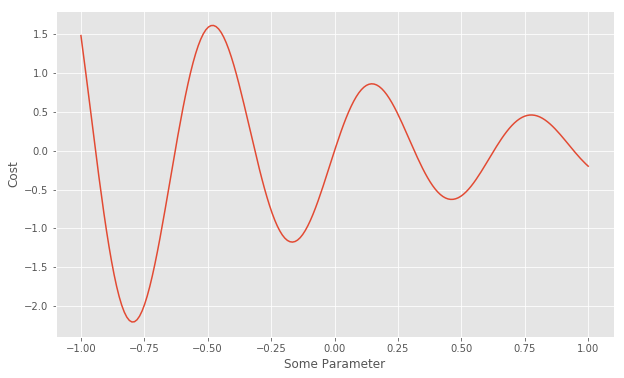

In [43]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

We'll never really ever be able to see our entire cost function like this.  If we were able to, we'd know exactly what parameter we should use.  So we're just imagining that as any parameters in our network change, this is how cost would change.  Since we know the value of the cost everywhere, we can easily describe the gradient using `np.diff`, which will just measure the difference between every value.  That's a good approximation of the gradient for this illustration at least.

In [44]:
gradient = np.diff(cost)

-0.24873082354986664

If we follow the negative gradient of this function given some randomly intialized parameter and a learning rate:

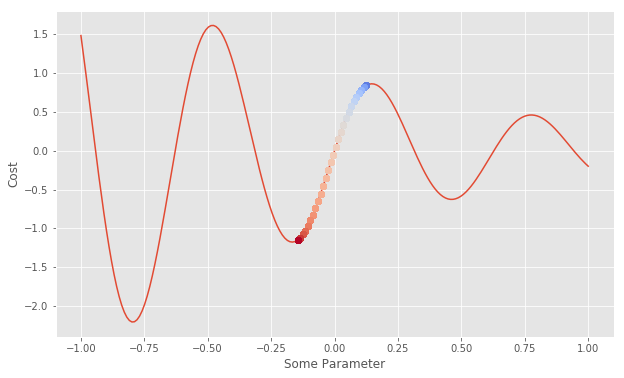

In [46]:
fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
# init_p = 120
init_p = np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1
for iter_i in range(n_iterations):
    init_p -= learning_rate * gradient[int(init_p)]
    ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

What this would mean is depending on where our random initialization of weights began, our final cost might end up being somewhere around -0.5.  This is a local minima.  It is, based on its surroundings, a minima.  But it is not the global minima.  In fact there are a few other possible places the network could have ended up, if our initialization led us to another point first, meaning our final cost would have been different.

This illustration is just for a single parameter... but our networks will often have millions of parameters... I'll illustrate the same idea with just two parameters to give you a sense of how quickly the problem becomes very difficult.

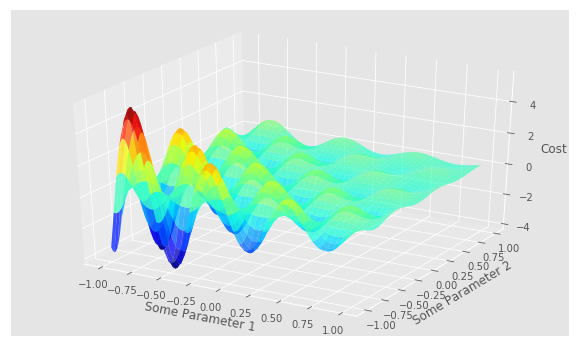

In [25]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

It turns out that in practice, as the number of your parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima.  That's good news for deep networks as we'll often work with that many parameters.

<a name="learning-rate"></a>
## Learning Rate

Another aspect of learning what our parameters should be, is how far along the gradient we should move our parameters?  That is also known as `learning_rate`.  Let's see what happens for different values of our learning rate:

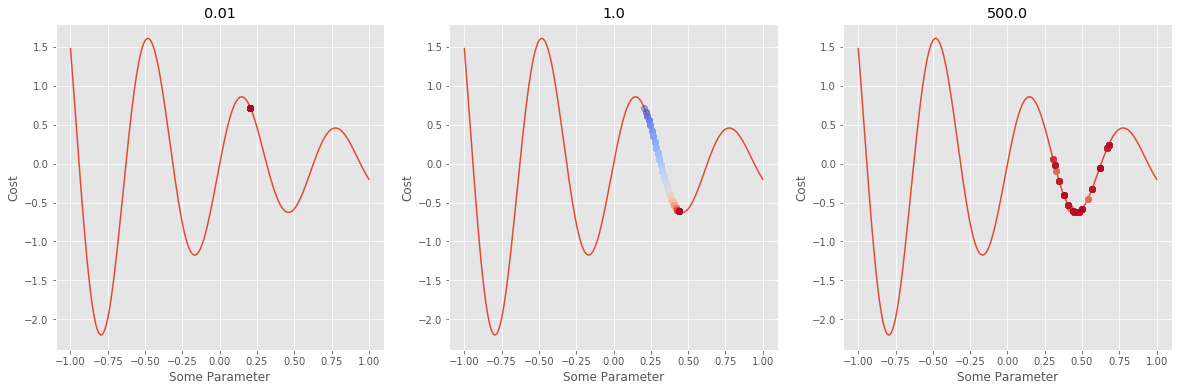

In [48]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        init_p -= learning_rate * gradient[int(init_p)]
        ax.plot(x[int(init_p)], cost[int(init_p)], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

In the first case, our learning rate was way too small.  It looks like we didn't manage to get any better cost than where we started!  In the second case, just right.  In the third case, our learning rate was too large.  Meaning, we overshot our minima, and moved past it.  So our cost has the effect of going up and down, instead of just going down like in the second case.

We'll learn more tricks for changing this landscape to be a bit more concave, reducing the number of local minima by regularizing the landscape through many different extensions to this same basic idea of following the negative slope of our gradient.  Before we can get into them we'll need to learn how to create a neural network.

<a name="creating-a-neural-network"></a>
# Creating a Neural Network

Let's try a simple example network.  We're going try to find a mapping of an input `X` to an output `y`, just like in our example of mapping an input image to either a 0 or 1.

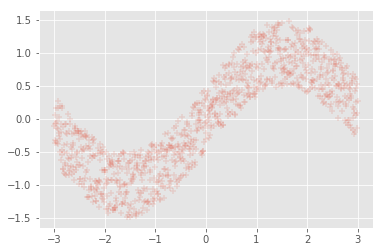

In [6]:
# Let's create some toy data

# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000

# Instead of having an image as our input, we're going to have values from -3 to 3.  This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.  To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some noise to the function, and try to have our algorithm discover the underlying cause of the data, which is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

So now we can see that there is a sine wave looking thing but it's really noisy.  We want to train a network to say, given any value on the $x$ axis, tell me what the value should be on the $y$ axis.  That is the fundamental idea of regression.  Predicting some continuous output value given some continuous input value.

<a name="defining-cost-1"></a>
## Defining Cost

We're going to use tensorflow to train our first network:

In [7]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

Now for parameters of our network.  We're going to transform our x values, just like we did with an image and filtering it.  In order to do that, we're going to multiply the value of x by some unknown value.  Pretty simple.  So what that lets us do is scale the value coming in.  We'll also allow for a simple shift by adding another number.  That lets us move the range of values to any new position.

But we need an initial value for our parameters.  For that, we're going to use values close to 0 using a gaussian function:

(array([   2.,   17.,   62.,  124.,  215.,  238.,  204.,   97.,   37.,    4.]),
 array([-3.31984186, -2.68859079, -2.05733972, -1.42608864, -0.79483757,
        -0.1635865 ,  0.46766458,  1.09891565,  1.73016672,  2.36141779,
         2.99266887]),
 <a list of 10 Patch objects>)

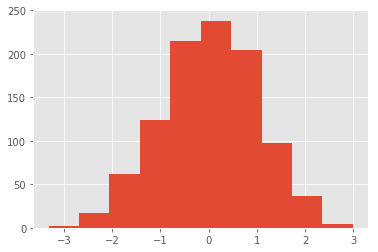

In [10]:
sess = tf.InteractiveSession()
n = tf.random_normal([1000]).eval()
plt.hist(n)

In order to do that, we can use the tensorflow `random_normal` function.  If we ask for 1000 values and then plot a histogram of the values, we can see that the values are centered around 0 and are mostly between -3 and 3.  For neural networks, we will usually want the values to start off much closer to 0.  To do that, we can control the standard deviation like so:

(array([   7.,   30.,   97.,  208.,  261.,  221.,  112.,   47.,   15.,    2.]),
 array([-0.30726072, -0.24032775, -0.17339478, -0.10646181, -0.03952884,
         0.02740413,  0.0943371 ,  0.16127007,  0.22820304,  0.29513601,
         0.36206898]),
 <a list of 10 Patch objects>)

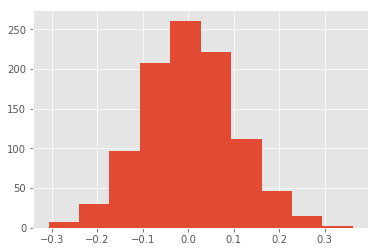

In [11]:
n = tf.random_normal([1000], stddev=0.1).eval()
plt.hist(n)

In [12]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us to define the value at the start of a run/eval.  It does need an initial value, which we'll give right now using the function tf.random_normal.  We could also pass an initializer, which is simply a function which will call the same function.  We'll see how that works a bit later.  In any case, the random_normal function just says, give me a random value from the "normal" curve.  We pass that value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

We're going to use gradient descent to learn what the best value of `W` and `b` is.  In order to do that, we need to know how to measure what the `best` is.  Let's think about that for a moment.  What is it we're trying to do?  We're trying to transform a value coming into the network, `x`, which ranges from values of -3 to 3, to match a known value, `Y`, which should be a sine wave which ranges from -1 to 1.  So any value into the network should make it seem like the network *represents* a sine wave.  Well we know what a sine wave should be.  We can just use python to calculate it for us.  We just need a function that measures distance:

In [13]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

In [14]:
# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

This function is just saying, give me the distance from the predicted value to the assumed underlying sine wave value.  But let's say this was some natural occuring data in the world.  Or a more complex function, like an image of oranges or apples.  We don't know what the function is that determines whether we perceive an image as an apple or orange.

In [ ]:
# cost = distance(Y_pred, ?)

But we do have a limited set of data that says what a given input *should* output.  That means we can still learn what the function might be based on the data.

So instead of our previous cost function, we'd have:

In [15]:
cost = distance(Y_pred, Y)

where `Y` is the *true* Y value.

Now it doesn't matter what the function is.  Our cost will measure the difference to the value we have for the input, and try to find the underlying function.  Lastly, we need to sum over every possible observation our network is fed as input.  That's because we don't give our network 1 `x` value at a time, but generally will give it 50-100 or more examples at a time.

In [16]:
cost = tf.reduce_mean(distance(Y_pred, Y))

<a name="training-parameters"></a>
## Training Parameters

Let's see how we can learn the parameters of this simple network using a tensorflow optimizer.

In [17]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

<TODO: Describe Train/Test sets, use test set to visualize rest of number line>

We tell the optimizer to minimize our `cost` variable which measures the distance between the prediction and actual `Y` value.  The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

We now just need to iteratively run the optimizer, just like we would run/eval any other part of our tensorflow graph.

0.665744
0.517178
0.447202
0.419007
0.406834
0.40224
0.400401
0.399467
0.398881
0.398562
0.398419
0.398336
0.398279
Reached a minimum, quit.


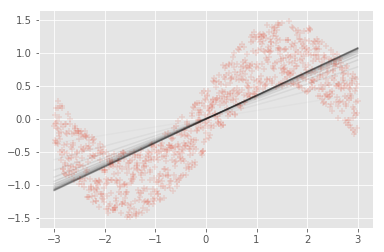

In [22]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
#             fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            print("Reached a minimum, quit.")
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

After running the code, we should see our original noisy data.  We call that the training data since it is training the network.  And we see the output of the network as a solid black line.

Now you might be thinking, wait, that looks like nothing like a sine wave... I mean it has got the general trend of the line I guess.  But it doesn't curve at all!  We're going to get into why that is in a moment.

But first, we're going to have to learn a bit more about the different between training and testing networks.

<a name="training-vs-testing"></a>
## Training vs. Testing

<TODO:>

<a name="stochastic-and-mini-batch-gradient-descent"></a>
## Stochastic and Mini Batch Gradient Descent

Now remember when I said our cost manifold would have many local minima, and that we'd learn some tricks to help us find the best one?  Well now we're ready to talk about two ways of helping with that.  One is using what are called mini-batches.  This is useful for a number of reasons.  First, it is generally impractical to look at an entire dataset.  You might have millions of images which you couldn't ever try loading all at once into a network.  Instead you would look at some random subset of them.  Second, we avoid trying to generalize our entire dataset, allowing us to navigate through more fine grained terrain.  In order to use mini batches, we simply iterate through our entire dataset, `batch_size` at a time:

In [23]:
idxs = np.arange(100)
batch_size = 10
n_batches = len(idxs) // batch_size
for batch_i in range(n_batches):
    print(idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

[0 1 2 3 4 5 6 7 8 9]
[10 11 12 13 14 15 16 17 18 19]
[20 21 22 23 24 25 26 27 28 29]
[30 31 32 33 34 35 36 37 38 39]
[40 41 42 43 44 45 46 47 48 49]
[50 51 52 53 54 55 56 57 58 59]
[60 61 62 63 64 65 66 67 68 69]
[70 71 72 73 74 75 76 77 78 79]
[80 81 82 83 84 85 86 87 88 89]
[90 91 92 93 94 95 96 97 98 99]


It turns out that this is not the best idea, because we're always looking at the same order of our dataset.  Neural networks love order.  They will pick up on any order you give it and use that to its advantage.  But the order of the data is entirely irrelevant to our problem.  In some cases, it may turn out to be exactly what we want to do.  For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.  Then we will have to make sure we're sending data in a certain order.  But for now, we really want to avoid using any order.

So we'll have to randomly permute the indexes of our dataset like so:

In [24]:
rand_idxs = np.random.permutation(idxs)
batch_size = 10
n_batches = len(rand_idxs) // batch_size
print('# of batches:', n_batches)
for batch_i in range(n_batches):
    print(rand_idxs[batch_i * batch_size : (batch_i + 1) * batch_size])

# of batches: 10
[82 87 49 56 66 47 45 24  8  1]
[99 42 36 52 65 38 63 35 11 48]
[50 91 59 23 70 33 28 34 61 76]
[98 81 86 97 15 88 51  5 14 57]
[69 17 96  7 27 10 53 37  6 32]
[79 92  0 73 77 54 12  4 71 89]
[19 40  3 72 26 68 43 31 67 90]
[58 84 20  2 18 74 22 25 44 39]
[95 85  9 30 78 83 21 93 29 75]
[46 13 16 80 60 94 55 62 64 41]


What we've done above is look at a range of 100 possible indexes by chunking them into `batch_size` at a time.  But we've also randomized the order we've looked at them so that we aren't prioritizing learning one part of a dataset over another.

We can implement this into our previous code like so:

0.584146
0.477034
0.431345
0.411764
0.404329
0.401218
0.399892
0.399167
0.398711
0.398469
0.398376
0.398306
0.398261
Reached a minimum, quit.


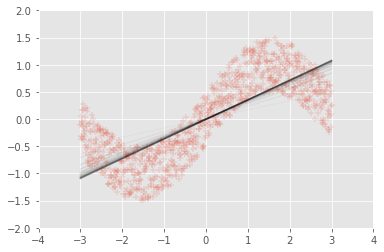

In [28]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
            
        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            print("Reached a minimum, quit.")
            break
            
        # Keep track of the training cost
        prev_training_cost = training_cost
# fig.show()
plt.draw()

The resulting process is also know as Mini-Batch Gradient Descent, since we are taking smaller batches of our data and performing gradient descent.  Further, it is Stochastic, meaning the order of the data presented is randomized, and is also commonly referred to as Stochastic Gradient Descent.  When the two ideas are combined, we have the best of both worlds: the mini batch part which allows us to get more stable updates; and the stochastic part which allows us to move to different parts of our cost's manifold entirely.  I'll just use Gradient Descent as we'll always want it to be in batches, and to be the stochastic kind.

Let's stick all of the code necessary for training into a function so we don't have to type it out again:

In [37]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.01):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
#     fig.show()
    plt.draw()

To get closer to a sine wave, we're going to have to be able to do more than simply scale our input with a multiplication!  What if we had a lot more parameters?  What if we have 10 different multiplications of the input?  What does your intuition tell you?  How are 10 more multiplications combined?  1000?  A million?

<QUIZ>

Would we be able to find a good representation then?  Let's try and see how we might do that:

0.525771
1.42167
1.2601
1.14554
1.35275
1.34441
1.16302
1.65339
1.47225
1.36959


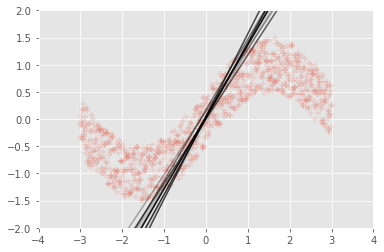

In [44]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

First, the training takes a lot longer!  That's because our network is much larger.  By adding 100 neurons, we've added 100 more multiplications, and 100 more additions for every observation.  Since we have 10000 observations, that's $(100 + 100) * 10000$ more computations just for computing the output, or 100 million more computations.  But that's not all.  We also need to compute the gradients of every parameter!  Having all of these extra parameters makes it much harder to find the best solution.  So as our network expands, the amount of memory and computation will grow very fast, and training becomes more difficult.

Despite increasing everything about our network, looking at the cost, we're not doing much better!  Why is that?  Well, we've added a lot more multiplications.  But it hasn't changed the fact that our function is still just a linear function.  Multiplying a millions times wouldn't help but instead just make it harder to find the same solution we found with far less parameters.  But also, the cost is going up and down, instead of just down.  That's a good sign that we should probably reduce the learning rate.

<a name="inputs-representation"></a>
## Input's Representation

In order to get more complexity, we could consider changing our input's representation.  For instance, if you are working with sound, it may not be the best idea to think about representing the sound as a signal, and instead you might want to explore using something like the discrete fourier transform.  Or if you're working with text, there may be other representations that will allow you to learn more useful features of your data such as word histograms.  There may be other possibilities depending on your application.

<a name="over-vs-underfitting"></a>
## Over vs. Underfitting

One technique for representing curved data like a sine wave is to consider the different polynomials of your input.

0.994906
0.487271
0.404083
0.398692
0.398248
0.398239
0.398237
0.398237
0.398237
0.39824


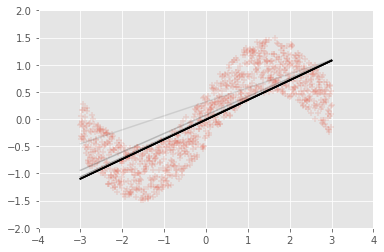

In [47]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 2):
    W = tf.Variable(tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

If we use the 0th and 1st expansion, that is $x^0$, which just equals 1, and $x^1$.  So $1 * W_1 + x * W_2$.  That's exactly the same as what we've just done.  It starts to get interesting once we add more powers:

0.833697
0.558982
0.406031
0.307073
0.336141
0.313262
0.289276
0.313489
0.259439
0.273212


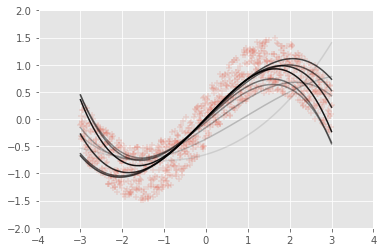

In [49]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

But we really don't want to add *too many* powers.  If we add just 1 more power:

0.935923
0.563601
0.681248
1.41758
1.36204
1.40982
0.921052
1.46861
0.830421
1.48079


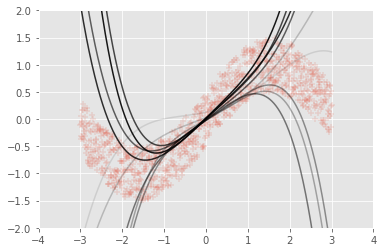

In [53]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

The whole thing is completely off.  In general, a polynomial expansion is hardly ever useful as it requires us to know what the underlying function is, meaning, what order polynomial is it?

<a name="introducing-nonlinearities--activation-function"></a>
## Introducing Nonlinearities / Activation Function

How else can we get our line to express the curves in our data?  What we'll explore instead is what happens when you add a non-linearity, which you might also hear be called an activation function.  That is a really essential ingredient to any deep network.  Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations.  By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course:

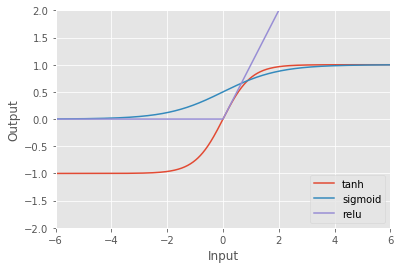

In [54]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

What each of these curves demonstrates is how instead of just multiplying an input by a number, creating another line, we *non*-linearly multiply the input value.  That just means we will multiply our input by a different value depending on what the input value is.  This allows us to express very complex ideas.  If we do this enough times, we can express anything.  Let's see how we can do this

2.21676
0.425366
0.370433
0.320106
0.289204
0.274074
0.266108
0.262011
0.260334
0.259619


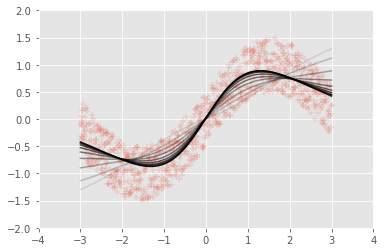

In [62]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

<TODO: Graphic of fully connected network, matrix>

It turns out that multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.  It's often called a fully-connected network, since everything is connected to everything else, meaning every neuron is multiplied by every single input value.  This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.

You might have seen this depicted like so:


<a name="going-deeper"></a>
## Going Deeper

Let's write a simply function for creating the same type of network as above:

In [63]:
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Let's now take a look at what the tensorflow graph looks like when we create this type of connection:

In [66]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful.  We can actually do a much better job here by creating our variables within *scopes*:

In [67]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer.  This initializer will create a new random value every time we call `sess.run(tf.global_variables_initializer())`.  We also pass some more sensible values for the initial mean and standard deviation.

Now let's look at the graph:

In [68]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

We can see that everything that is part of creating a linear connection is under the scoped tag we have given it.

If we create multiple linear connections, this becomes really useful for understanding what's in our graph:

In [69]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

<TODO: Also, we can visualize our network using Tensorboard...>

<a name="image-inpainting"></a>
# Image Inpainting

<a name="description"></a>
## Description

Now we've got most of the tools we'll need to perform much more complicated tasks.  We'll first explore a fun application: painting an image.  This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has done in his online demonstration of "image inpainting".  Let's first get an image that we'll try to teach a neural network to paint.

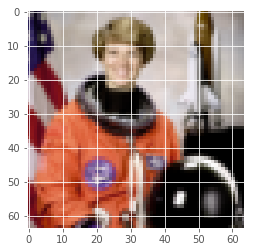

In [70]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

Instead of using a network to go from some x position to the value of a sine wave, what we're going to do instead teach a network to go from the location on an image frame to a particular color.  So given any position in an image, the network will need to learn what color to paint.  Despite the seeming complexity of this task, it is remarkably similar to what we've just done.  Let's take a look.

In [71]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

What we're going to do is use regression to predict the value of a pixel given its (row, col) position.  So the input to our network is `X = (row, col)` value.  And the output of the network is `Y = (r, g, b)`.

We can get our original image back by reshaping the colors back into the original image shape:

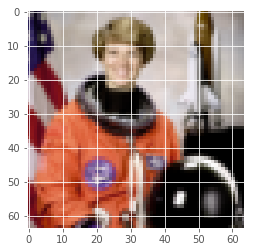

In [72]:
plt.imshow(ys.reshape(img.shape))

Remember before, we were using regression to input to our network `X = x`, and output `Y = y`.  The only thing that is changing here is the number of values in our input and output, and what they represent to us.  But Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition.  We'll stick with the convention of using the variable `X` to denote the input to the network, and `Y` to denote the output of the network.

In [73]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

<a name="building-the-network"></a>
## Building the Network

For our model, we'll make our first deep neural network!  Instead of having a single fully connected layer, we'll have many layers.  We'll make use of a for loop to simplify the creation of the network. The network will look like:

<TODO: wacom/motion-graphic>

In [74]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

The rest of this code is pretty much the same as what we've done in previous networks.  We setup our cost.  Except before, we only ever had 1 feature.  In this network, our output is 3 vaules, `r`, `g`, `b`.

<a name="training"></a>
## Training

In order to better measure the error, we'll sum the error across all 3 values.  There are many ways we could have approached this which we'll get into in later sessions.

In [75]:
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

We're going to use a different type of optimizer called `AdamOptimizer` which in general will work better than the original `GradientDescentOptimizer`.  It's pretty similar, except it has some tricks to help with gradient descent.  Getting into the details of it is beyond the scope of what we have time for.  So long as you're not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

In [76]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

The rest of the code is pretty much the same.  We create the optimizer exactly the same way, by giving it our cost.  And then create a session to iterate over chunks of our training data.  Every 20 iterations, we're going to draw the predicted image by evaluating the predicted image tensor, `Y_pred`, and giving it every location in the image to predict, the `xs` array.  This will return us the predicted color values for those locations.  This process will take awhile!

0 173.999
1 162.361
2 158.285
3 156.753
4 153.101
5 151.283
6 150.256
7 146.084
8 142.88
9 141.288
10 137.604
11 134.072
12 134.509
13 129.67
14 126.287
15 127.474
16 122.479
17 121.596
18 117.318
19 117.452


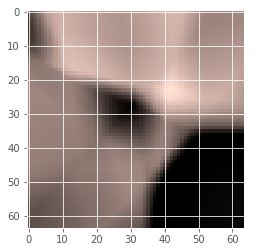

20 115.023
21 115.825
22 115.207
23 113.344
24 117.292
25 112.065
26 114.096
27 107.459
28 104.157
29 102.623
30 94.5132
31 94.1663
32 93.121
33 93.2784
34 98.369
35 94.4308
36 92.086
37 92.8165
38 98.1395
39 94.7464


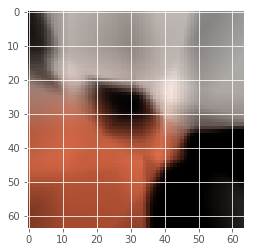

40 93.8993
41 90.7767
42 91.5218
43 92.1044
44 92.3931
45 91.0934
46 90.5316
47 97.2949
48 89.4149
49 88.8006
50 90.3994
51 90.7394
52 90.6664
53 91.2891
54 89.2518
55 92.5864
56 91.2884
57 87.6536
58 87.2743
59 89.479


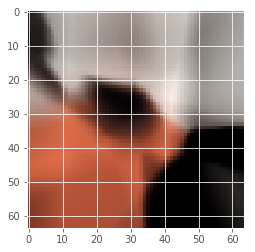

60 87.1404
61 86.7898
62 87.5199
63 88.4232
64 88.7566
65 86.1438
66 85.729
67 85.7854
68 85.8565
69 87.4069
70 84.7649
71 86.1794
72 90.4016
73 82.5088
74 83.4057
75 83.8047
76 82.9439
77 85.8346
78 82.0314
79 81.5276


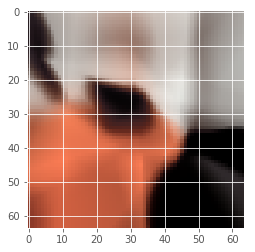

80 81.579
81 81.2904
82 80.1978
83 81.0954
84 86.0524
85 81.787
86 84.1972
87 77.82
88 77.9881
89 80.5591
90 77.3206
91 77.4726
92 81.0266
93 76.342
94 76.2725
95 72.6398
96 74.3108
97 74.2777
98 75.3448
99 72.9486


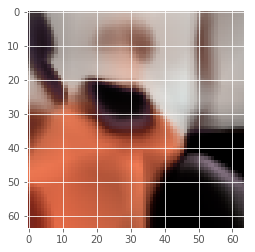

100 80.4003
101 71.0701
102 70.3102
103 69.5016
104 70.3113
105 73.8642
106 69.1901
107 66.6828
108 70.5597
109 68.5579
110 70.6646
111 66.2
112 66.6106
113 67.5997
114 73.4308
115 71.6474
116 66.2731
117 63.2566
118 71.5653
119 62.4573


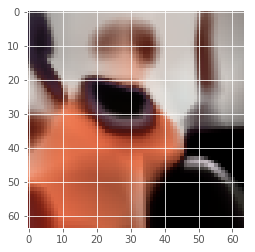

120 69.1566
121 65.2692
122 61.8744
123 62.8469
124 65.5397
125 62.4973
126 60.666
127 61.7207
128 66.9842
129 60.1819
130 60.2003
131 59.5394
132 69.4142
133 63.5801
134 58.8983
135 60.8268
136 58.5728
137 60.6387
138 58.1465
139 63.8053


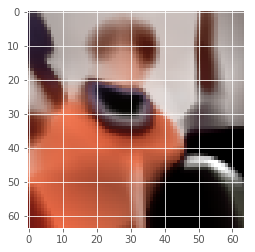

140 57.8463
141 57.3516
142 60.1323
143 63.3542
144 57.1735
145 58.7471
146 57.3043
147 59.0882
148 58.1242
149 59.394
150 57.9032
151 57.9095
152 57.1249
153 60.4753
154 58.7115
155 65.3843
156 59.1905
157 55.9007
158 56.2688
159 56.95


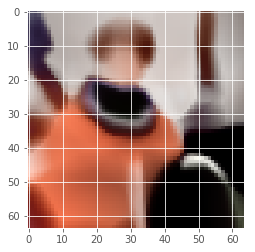

160 58.7199
161 53.4467
162 54.0885
163 55.7437
164 56.1954
165 64.2573
166 53.3894
167 58.2781
168 58.7225
169 54.0209
170 58.4172
171 55.4797
172 52.6677
173 57.5592
174 53.955
175 52.8693
176 55.8586
177 54.0472
178 52.9444
179 53.3755


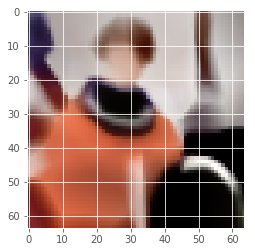

180 50.3737
181 53.453
182 52.0863
183 53.6063
184 52.4134
185 54.0409
186 55.409
187 56.1581
188 53.0304
189 54.3393
190 57.0767
191 52.5669
192 50.9314
193 49.3059
194 51.2961
195 61.928
196 54.7137
197 53.7715
198 57.9385
199 48.8618


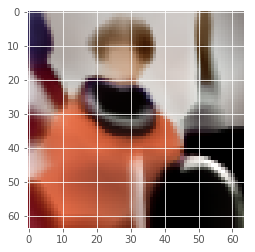

200 50.4114
201 53.2496
202 51.1304
203 50.2396
204 51.1325
205 56.7271
206 52.963
207 50.0339
208 50.3674
209 49.8215
210 48.9763
211 51.8023
212 51.2754
213 48.9455
214 51.3897
215 54.7856
216 50.089
217 55.7332
218 47.8679
219 49.8658


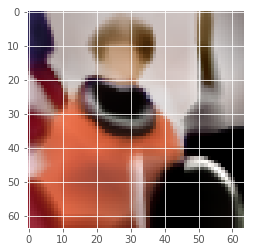

220 50.0307
221 50.7352
222 48.2283
223 52.0481
224 47.723
225 49.8407
226 50.8485
227 45.7511
228 50.2079
229 50.7871
230 51.6066
231 49.5904
232 47.6739
233 47.6913
234 48.3226
235 48.3366
236 49.4542
237 49.5104
238 49.805
239 45.4546


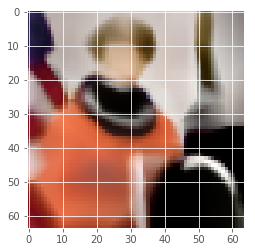

240 47.5795
241 48.203
242 49.0749
243 48.9435
244 52.0413
245 49.3906
246 51.1196
247 47.8111
248 46.1517
249 46.405
250 47.7271
251 48.0587
252 47.5079
253 48.8817
254 47.7182
255 46.4578
256 48.2407
257 48.523
258 47.7792
259 44.2161


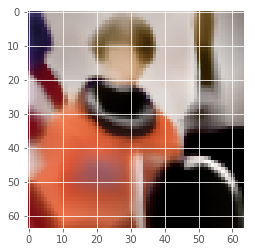

260 46.003
261 46.9829
262 47.6613
263 45.8892
264 46.5203
265 46.067
266 43.9088
267 49.4077
268 46.3348
269 48.4255
270 44.9921
271 44.8005
272 46.2271
273 47.4746
274 45.5173
275 46.2284
276 48.1022
277 44.8539
278 46.9321
279 44.9065


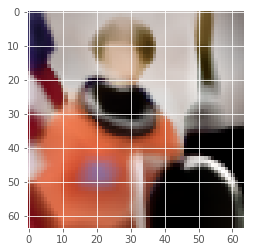

280 50.2782
281 44.0789
282 47.6987
283 43.5605
284 43.7959
285 47.0112
286 44.6015
287 41.6467
288 44.6307
289 50.8628
290 43.6514
291 46.1336
292 52.0922
293 47.4825
294 42.5316
295 43.9814
296 45.4113
297 45.7852
298 44.7771
299 46.0592


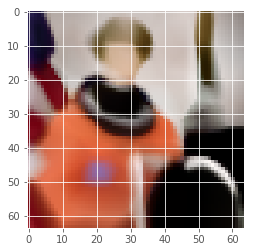

300 41.9165
301 44.1556
302 47.6677
303 43.7413
304 42.6509
305 47.3591
306 42.6161
307 42.6488
308 43.8602
309 47.0275
310 42.9172
311 47.9686
312 43.255
313 45.781
314 44.2118
315 43.4325
316 41.7872
317 43.4087
318 42.519
319 43.8334


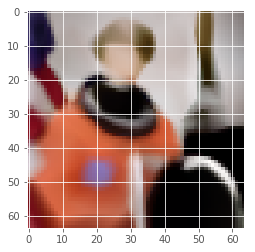

320 42.6076
321 47.7747
322 46.2023
323 43.4448
324 48.6815
325 41.5805
326 44.5412
327 43.2038
328 43.693
329 43.588
330 45.0154
331 42.2355
332 45.4197
333 44.1059
334 42.6947
335 41.0018
336 41.3314
337 41.3623
338 44.8984
339 40.8422


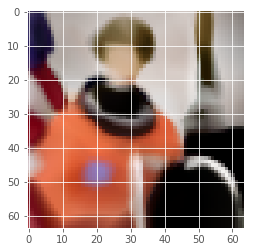

340 42.5121
341 40.4182
342 40.4694
343 40.98
344 44.6731
345 42.4128
346 42.5451
347 43.0009
348 44.9095
349 42.5387
350 43.3953
351 44.4042
352 43.3478
353 42.0757
354 41.2169
355 43.6182
356 44.485
357 43.4539
358 41.652
359 44.1954


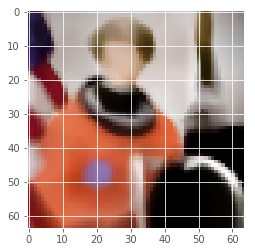

360 39.1363
361 45.8165
362 40.6034
363 38.9861
364 40.31
365 40.7383
366 42.5356
367 44.5878
368 39.1072
369 40.762
370 44.5504
371 42.4186
372 42.6525
373 42.1502
374 42.0435
375 42.0969
376 43.1174
377 40.5393
378 41.0527
379 41.1115


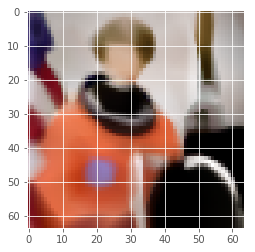

380 42.3417
381 41.4752
382 42.124
383 39.6201
384 42.9253
385 41.5053
386 41.1278
387 45.3581
388 38.7823
389 43.3416
390 42.6751
391 40.4238
392 40.6675
393 40.0051
394 43.3311
395 39.1217
396 39.9212
397 42.5496
398 41.0208
399 41.1381


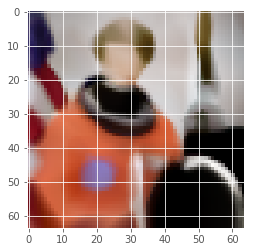

400 41.475
401 43.7141
402 41.588
403 41.9642
404 38.9271
405 40.9958
406 37.9147
407 43.8095
408 38.8541
409 42.8857
410 41.7969
411 39.3344
412 40.3299
413 41.1991
414 40.9701
415 39.8939
416 37.5666
417 43.2608
418 41.6475
419 39.2585


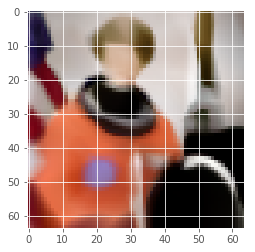

420 39.2833
421 41.6916
422 40.0735
423 42.1166
424 39.6497
425 38.3371
426 38.8217
427 39.2511
428 40.1914
429 44.5913
430 38.884
431 40.2225
432 39.4644
433 37.6169
434 41.9113
435 38.5501
436 40.4503
437 39.8344
438 37.8525
439 37.1905


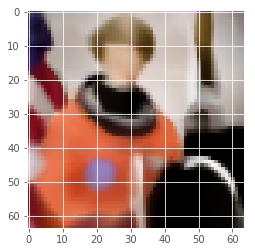

440 38.9896
441 38.9457
442 38.727
443 37.3724
444 40.7633
445 40.3939
446 41.6609
447 39.5529
448 40.3744
449 43.8493
450 37.7863
451 38.1788
452 38.163
453 37.6899
454 40.9346
455 41.2567
456 37.0497
457 40.0693
458 38.2678
459 39.2372


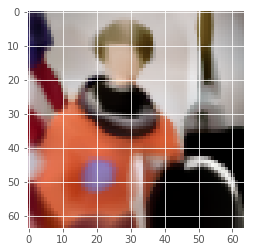

460 41.2633
461 38.0791
462 39.331
463 40.0283
464 37.9282
465 37.3256
466 38.3807
467 40.3626
468 39.5816
469 37.3566
470 40.273
471 37.4719
472 37.5506
473 41.5457
474 36.2493
475 38.9689
476 36.6692
477 38.9349
478 41.1858
479 38.4041


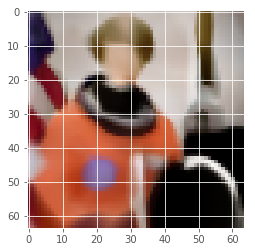

480 37.3064
481 38.4346
482 39.3542
483 36.205
484 38.0628
485 40.8503
486 39.193
487 36.2843
488 37.3077
489 37.5311
490 37.5363
491 38.8445
492 40.912
493 42.0523
494 37.2413
495 35.9675
496 37.3175
497 35.5611
498 36.2455
499 37.7171


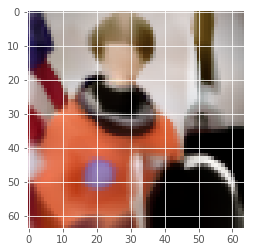

In [77]:
n_iterations = 500
batch_size = 50
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        if (it_i + 1) % 20 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)
            plt.show()

After letting this run for a few minutes, we'll see the image becoming more like the original image.

<a name="homework"></a>
# Homework:

Head over to the [notebook](session-2.ipynb) for more details.

<a name="reading"></a>
# Reading:

Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951. 

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society. 

Yann Lecun. Efficient BackProp. 1998.
http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.